
After Encoding:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  

Model Trained Successfully!

Accuracy: 0.8848833351763795

Confusion Matrix:
 [[7749  203]
 [ 838  253]]

Classification Re

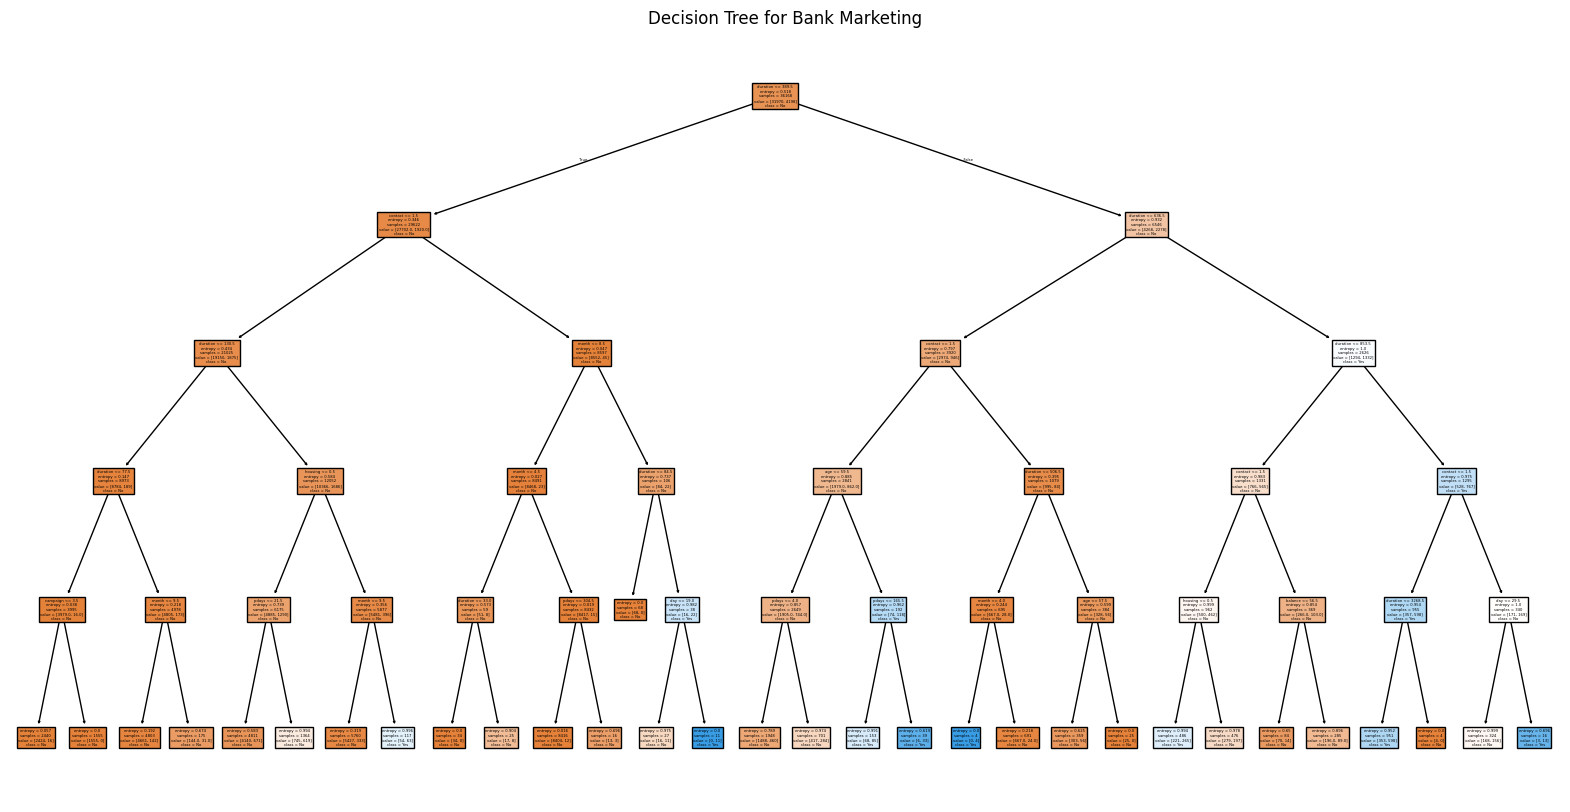

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("C:\\Users\\G. Ragachandrika\\Downloads\\bank+marketing\\bank\\bank-full.csv", sep=';')
df.head()
# Step 3: Encode Categorical Variables
label_encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nAfter Encoding:")
print(df.head())



# Step 4: Define Features and Target Variable
X = df.drop('y', axis=1)
y = df['y']


# Step 5: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 6: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

print("\nModel Trained Successfully!")
# Step 7: Make Predictions
y_pred = clf.predict(X_test)

# Step 8: Evaluate the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Step 9: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree for Bank Marketing")
plt.show()


